In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('final_csv_test.csv')

In [3]:
df.tail()

,id,EDA,TEMP,BVP,HR
451265,S35,0.229625,99999.0,3.92,99999.0
451266,S35,0.229625,99999.0,9.85,99999.0
451267,S35,0.228344,99999.0,14.94,99999.0
451268,S35,0.229625,99999.0,19.16,99999.0
451269,S35,0.228344,99999.0,22.43,99999.0


In [4]:
df.isna().sum()

id      0
EDA     0
TEMP    0
BVP     0
HR      0
dtype: int64

In [5]:
# REPLACE 99999 by N/A for simplifiaction
df.replace(99999.0, 'na', inplace=True)

In [6]:
df.isnull().sum()

id      0
EDA     0
TEMP    0
BVP     0
HR      0
dtype: int64

In [7]:
df.head()

,id,EDA,TEMP,BVP,HR
0,S02,4.000000,4.0,64.0,1.0
1,S02,0.000000,34.79,-0.0,118.0
2,S02,0.622764,34.79,-0.0,113.5
3,S02,0.759875,34.79,-0.0,93.0
4,S02,0.883157,34.79,-0.0,93.25


In [8]:
na_count = (df == 'na').mean()
na_count

id      0.000000
EDA     0.000000
TEMP    0.000412
BVP     0.000000
HR      0.750695
dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451270 entries, 0 to 451269
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      451270 non-null  object 
 1   EDA     451270 non-null  float64
 2   TEMP    451270 non-null  object 
 3   BVP     451270 non-null  float64
 4   HR      451270 non-null  object 
dtypes: float64(2), object(3)
memory usage: 17.2+ MB


In [10]:
target_column = 'HR'
df[target_column] = df[target_column].apply(lambda x: np.random.uniform(90, 180) if x == "na" else x)

# impute TEMP column
# Replace 'na' strings with np.nan in column 'A'
df['TEMP'] = df['TEMP'].replace('na', np.nan)

# Impute missing values in column 'A' using the mean of column 'A'
df['TEMP'] = df['TEMP'].fillna(df['TEMP'].mean())

# # Save the updated DataFrame back to the same CSV file
# file_path = 'combined_csv_test_HR.csv'
# df.to_csv(file_path, index=False)

C:\Users\GANESH\AppData\Local\Temp\ipykernel_20776\2230725276.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['TEMP'] = df['TEMP'].replace('na', np.nan)


In [11]:
df.tail()

,id,EDA,TEMP,BVP,HR
451265,S35,0.229625,31.29009,3.92,145.148514
451266,S35,0.229625,31.29009,9.85,106.616953
451267,S35,0.228344,31.29009,14.94,176.555983
451268,S35,0.229625,31.29009,19.16,109.319105
451269,S35,0.228344,31.29009,22.43,158.692845


In [12]:
na_count = (df == 'na').mean()
na_count

id      0.0
EDA     0.0
TEMP    0.0
BVP     0.0
HR      0.0
dtype: float64

<Axes: >

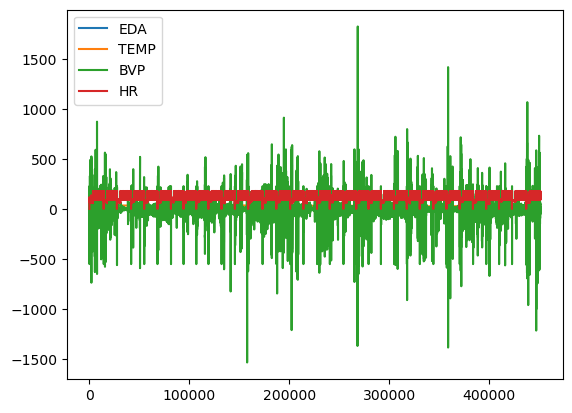

In [13]:
df.plot()

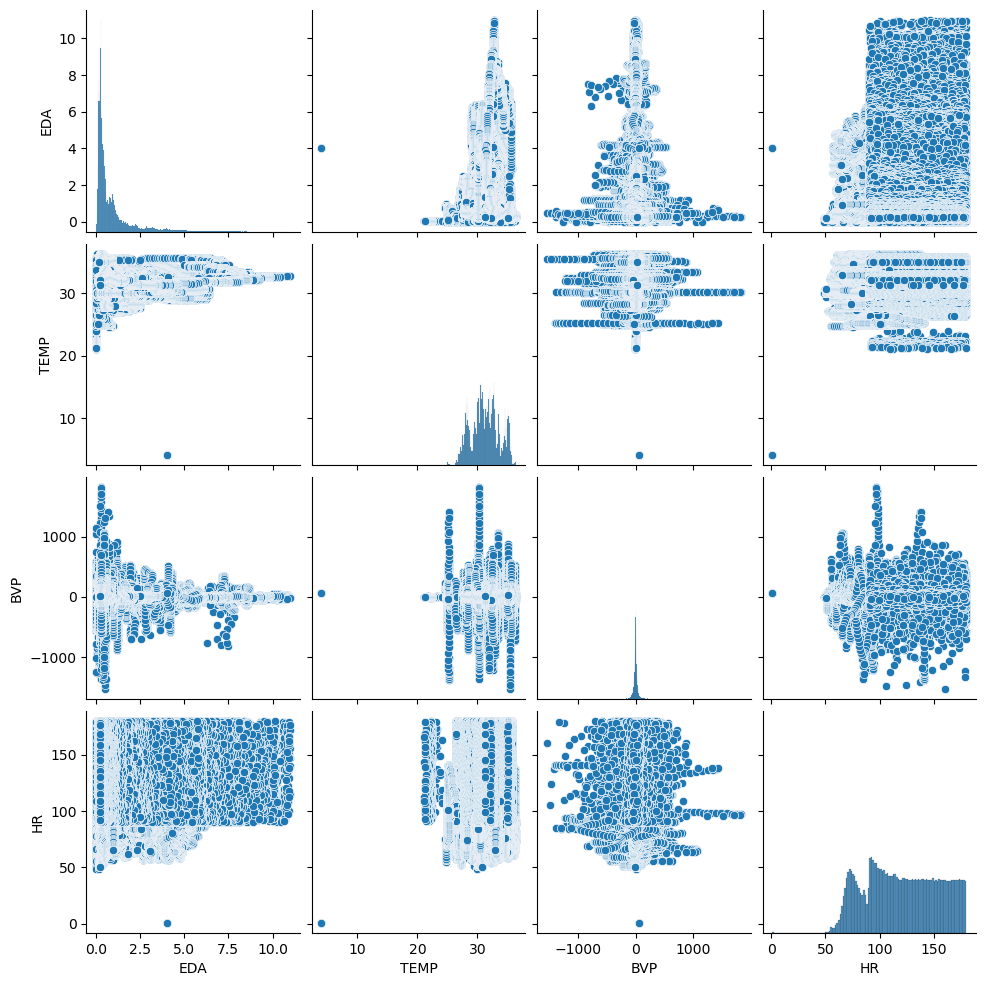

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)

# Show the plot
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451270 entries, 0 to 451269
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      451270 non-null  object 
 1   EDA     451270 non-null  float64
 2   TEMP    451270 non-null  float64
 3   BVP     451270 non-null  float64
 4   HR      451270 non-null  float64
dtypes: float64(4), object(1)
memory usage: 17.2+ MB


In [16]:
na_count = (df == 'na').sum()
na_count

id      0
EDA     0
TEMP    0
BVP     0
HR      0
dtype: int64

In [17]:
df.describe()

,EDA,TEMP,BVP,HR
count,451270.000000,451270.000000,451270.000000,451270.000000
mean,0.957080,31.290090,0.023578,121.318175
std,1.324882,2.336219,67.463498,33.285646
min,0.000000,4.000000,-1531.900000,1.000000
25%,0.240890,29.690000,-13.710000,94.139884
50%,0.430794,31.310000,1.300000,120.330141
75%,1.040876,32.810000,15.620000,149.898316
max,11.005073,36.390000,1822.090000,179.999614


In [18]:
# Skewed data to normal data

from scipy import stats
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=False)
df['EDA'] = pt.fit_transform(df[['EDA']])

In [ ]:
# !pip install ydata-profiling

ERROR: Ignored the following versions that require a different python version: 4.0.0 Requires-Python >=3.7, <3.11; 4.1.0 Requires-Python >=3.7, <3.12; 4.1.1 Requires-Python >=3.7, <3.12; 4.1.2 Requires-Python >=3.7, <3.12; 4.10.0 Requires-Python <3.13,>=3.7; 4.11.0 Requires-Python <3.13,>=3.7; 4.12.0 Requires-Python <3.13,>=3.7; 4.2.0 Requires-Python >=3.7, <3.12; 4.3.0 Requires-Python >=3.7, <3.12; 4.3.1 Requires-Python >=3.7, <3.12; 4.3.2 Requires-Python >=3.7, <3.12; 4.4.0 Requires-Python >=3.7, <3.12; 4.5.0 Requires-Python >=3.7, <3.12; 4.5.1 Requires-Python >=3.7, <3.12; 4.6.0 Requires-Python >=3.7, <3.12; 4.6.1 Requires-Python >=3.7, <3.12; 4.6.2 Requires-Python >=3.7, <3.12; 4.6.3 Requires-Python >=3.7, <3.12; 4.6.4 Requires-Python >=3.7, <3.12; 4.6.5 Requires-Python >=3.7, <3.12; 4.7.0 Requires-Python >=3.7, <3.13; 4.8.3 Requires-Python <3.13,>=3.7; 4.9.0 Requires-Python <3.13,>=3.7
ERROR: Could not find a version that satisfies the requirement ydata-profiling (from versions: n

In [19]:
from ydata_profiling import ProfileReport

# Read the CSV file into a dataframe
#df = pd.read_csv(r'C:\Users\sahus\Stress-Prediction\final_csv_test.csv')

# Generate a profiling report
profile = ProfileReport(df, title="Data Profile Report", explorative=True)

# Save the report to an HTML file
profile.to_file("data_profile.html")

print("The profiling report has been generated!")


ModuleNotFoundError: No module named 'ydata_profiling'

In [21]:
df.drop(['id'], axis=1, inplace=True)

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# X1 = [3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8]
# X2 = [5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3]
# plt.scatter(X1,X2)
# plt.show()

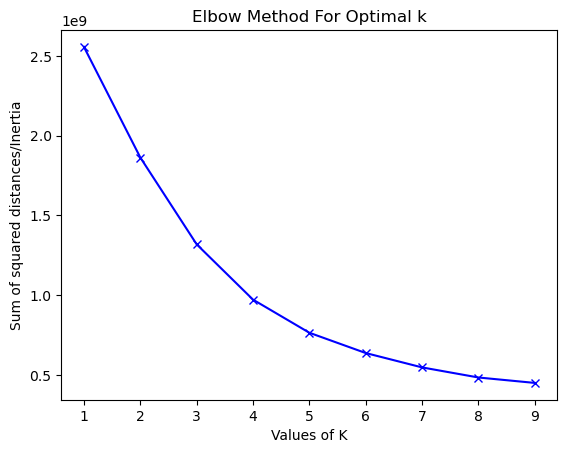

In [23]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

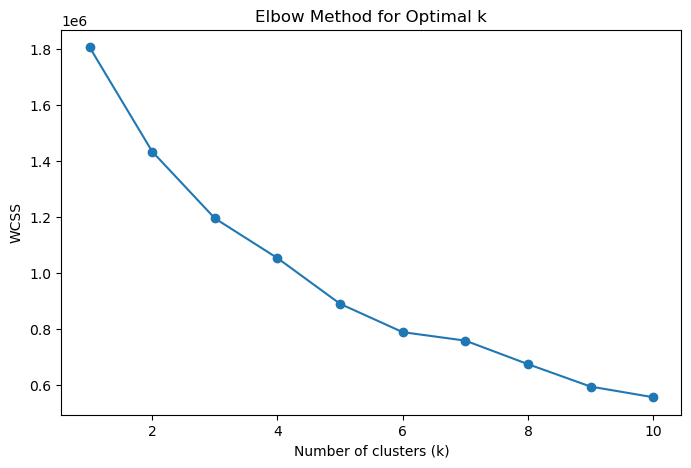

In [24]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
 
 
# Assume df is your DataFrame with unlabeled data
X = df.values  # Convert DataFrame to array
 
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 
# Elbow Method to find optimal k
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
 
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()


In [25]:
k_optimal = 2 # Set optimal k based on elbow plot
kmeans = KMeans(n_clusters=k_optimal,  n_init=100, init="k-means++")
cluster_labels = kmeans.fit_predict(X_scaled)

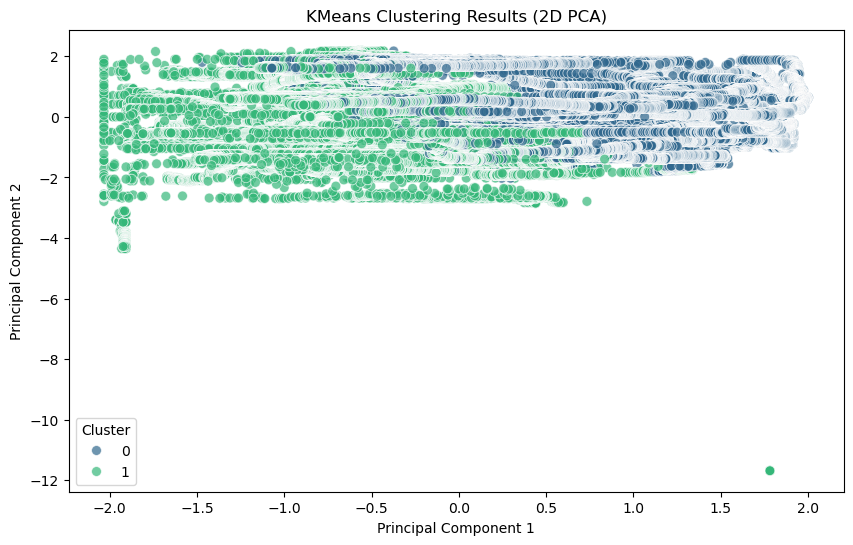

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=cluster_labels, palette='viridis', s=50, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans Clustering Results (2D PCA)")
plt.legend(title="Cluster")
plt.show()

        EDA   TEMP   BVP      HR  Cluster
0  0.563729   4.00  64.0    1.00        1
1 -0.000000  34.79  -0.0  118.00        1
2  0.333482  34.79  -0.0  113.50        0
3  0.367651  34.79  -0.0   93.00        0
4  0.392873  34.79  -0.0   93.25        0


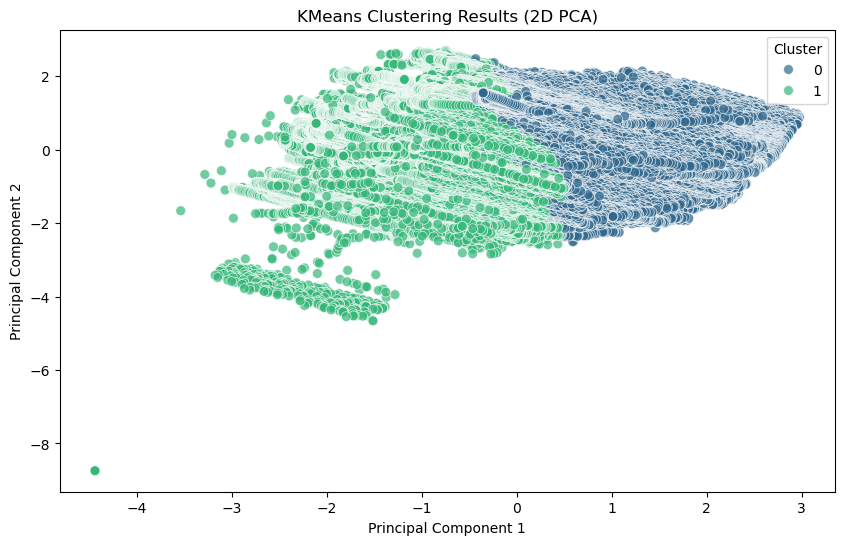

In [27]:
# Add cluster labels to DataFrame
df['Cluster'] = cluster_labels
print(df.head())
 
# Visualize with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
 
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', s=50, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans Clustering Results (2D PCA)")
plt.legend(title="Cluster")
plt.show()
 
# Analyze cluster centers
#cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
#centers_df = pd.DataFrame(cluster_centers, columns=df.columns[:-1])  # Assuming last column is 'Cluster'
#print("Cluster Centers:\n", centers_df)
 
# Check cluster sizes
#print(df['Cluster'].value_counts())

In [28]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)
 
# # Plot t-SNE results with cluster labels
# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
# plt.colorbar(scatter, label='Cluster')
# plt.title("t-SNE Clustering Visualization")
# plt.xlabel("t-SNE Component 1")
# plt.ylabel("t-SNE Component 2")
# plt.show()

KeyboardInterrupt: 